In [9]:
pip install --upgrade yfinance


  Obtaining dependency information for yfinance from https://files.pythonhosted.org/packages/09/05/28664524fcc67c078313d482bf25fe403e9399130622cfc89e185ec0abf6/yfinance-0.2.54-py2.py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.7/108.7 kB 1.4 MB/s eta 0:00:00a 0:00:01
  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.50
    Uninstalling yfinance-0.2.50:
      Successfully uninstalled yfinance-0.2.50
Note: you may need to restart the kernel to use updated packages.


In [7]:
import yfinance as yf

# Definir o ticker da ação (por exemplo, Petrobras - PETR4.SA)
ticker = "PETR4.SA"  

# Baixar os dados dos últimos 5 anos
df = yf.download(ticker, period="5y")

[*********************100%***********************]  1 of 1 completed


In [8]:
print(df.head())

Price          Close      High       Low      Open     Volume
Ticker      PETR4.SA  PETR4.SA  PETR4.SA  PETR4.SA   PETR4.SA
Date                                                         
2020-03-19  3.906730  4.181897  3.471583  3.541974  157065200
2020-03-20  3.839539  4.319481  3.785145  4.194696  149029900
2020-03-23  3.679558  3.897131  3.609166  3.874734  107092400
2020-03-24  4.239491  4.332279  3.929128  4.021917  114259200
2020-03-25  4.581849  4.732231  4.105106  4.236291  158286200


In [9]:
df_ibov = yf.download("^BVSP", period="1mo")
print(df_ibov.head())


[*********************100%***********************]  1 of 1 completed

Price          Close      High       Low      Open    Volume
Ticker         ^BVSP     ^BVSP     ^BVSP     ^BVSP     ^BVSP
Date                                                        
2025-02-19  127309.0  128528.0  127028.0  128528.0   9295100
2025-02-20  127601.0  127871.0  127063.0  127309.0  10640300
2025-02-21  127128.0  127654.0  126483.0  127601.0  11093300
2025-02-24  125401.0  127275.0  125162.0  127129.0  10148900
2025-02-25  125980.0  126718.0  125382.0  125401.0  11078000


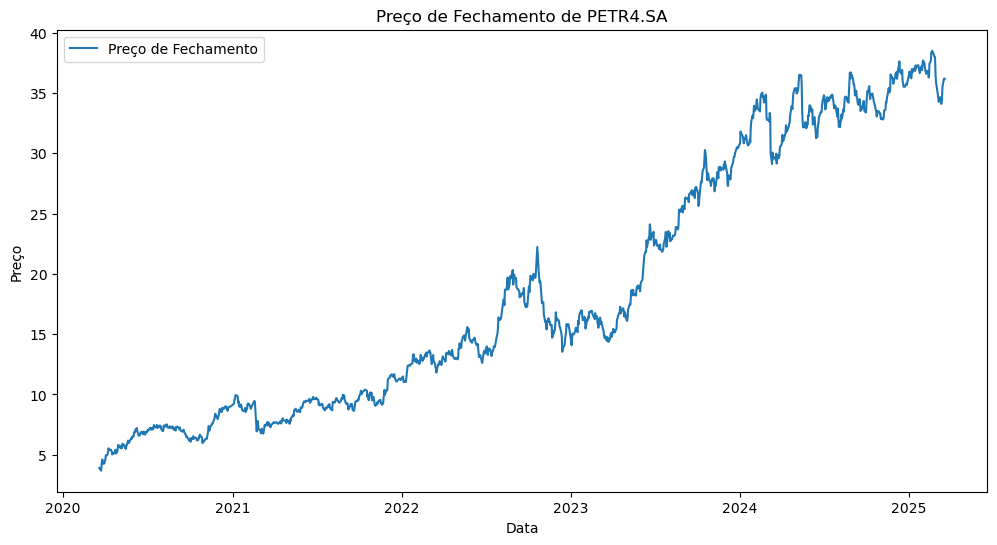

In [10]:
import matplotlib.pyplot as plt

# Gráfico de preço de fechamento
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Preço de Fechamento")
plt.title(f"Preço de Fechamento de {ticker}")
plt.xlabel("Data")
plt.ylabel("Preço")
plt.legend()
plt.show()


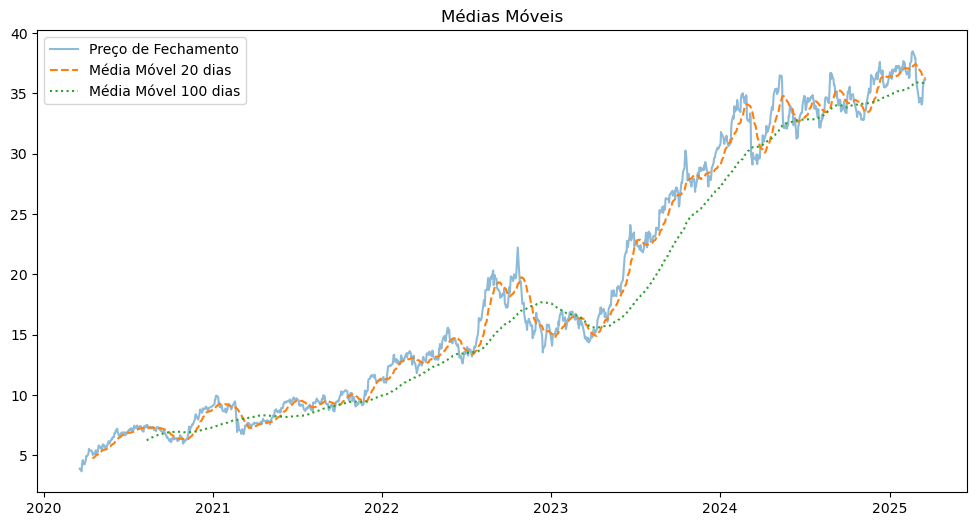

In [11]:
df['MM_20'] = df['Close'].rolling(window=20).mean()
df['MM_100'] = df['Close'].rolling(window=100).mean()

# Plotando as médias móveis
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Preço de Fechamento", alpha=0.5)
plt.plot(df['MM_20'], label="Média Móvel 20 dias", linestyle="dashed")
plt.plot(df['MM_100'], label="Média Móvel 100 dias", linestyle="dotted")
plt.title("Médias Móveis")
plt.legend()
plt.show()

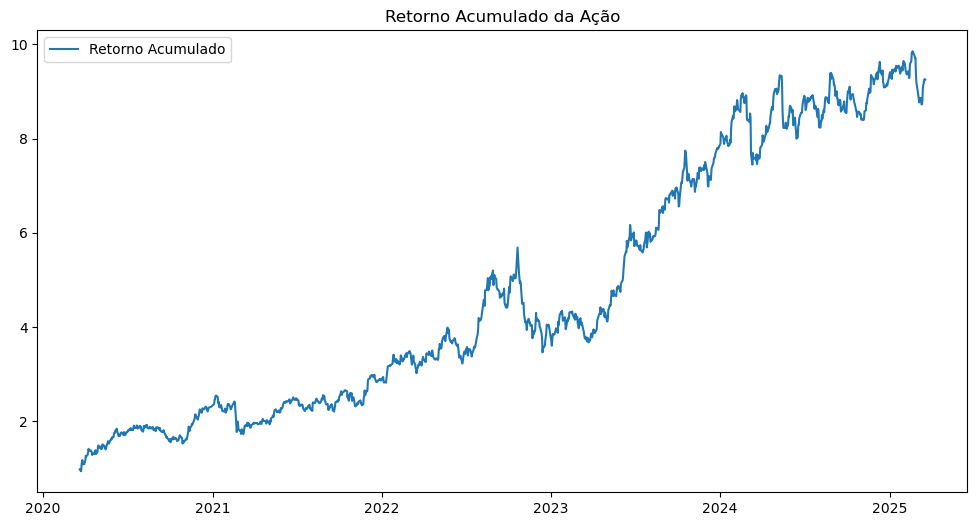

In [12]:
df['Retorno_Diário'] = df['Close'].pct_change()
df['Retorno_Acumulado'] = (1 + df['Retorno_Diário']).cumprod()

# Plotando o retorno acumulado
plt.figure(figsize=(12,6))
plt.plot(df['Retorno_Acumulado'], label="Retorno Acumulado")
plt.title("Retorno Acumulado da Ação")
plt.legend()
plt.show()

In [13]:
# Baixar dados do Ibovespa
ibov = yf.download("^BVSP", period="5y")['Close']

# Comparação de retornos
df['Retorno_IBOV'] = ibov.pct_change()
correlacao = df[['Retorno_Diário', 'Retorno_IBOV']].corr()
print(correlacao)


[*********************100%***********************]  1 of 1 completed

Price                 Retorno_Diário Retorno_IBOV
Ticker                                           
Price          Ticker                            
Retorno_Diário              1.000000     0.643341
Retorno_IBOV                0.643341     1.000000


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Criando um recurso de previsão (preço de fechamento deslocado)
df['Future_Close'] = df['Close'].shift(-5)  # Prevendo 5 dias no futuro

# Definir variáveis
X = df[['Open', 'High', 'Low', 'Volume']].dropna()
y = df['Future_Close'].dropna()

# Garantir que os conjuntos estejam alinhados
X, y = X.iloc[:-5], y

# Separar treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Treinar modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo.predict(X_test)

# Avaliação do modelo
from sklearn.metrics import mean_absolute_error
erro = mean_absolute_error(y_test, y_pred)
print(f"Erro Médio Absoluto: {erro:.2f}")


Erro Médio Absoluto: 0.51


[*********************100%***********************]  1 of 1 completed


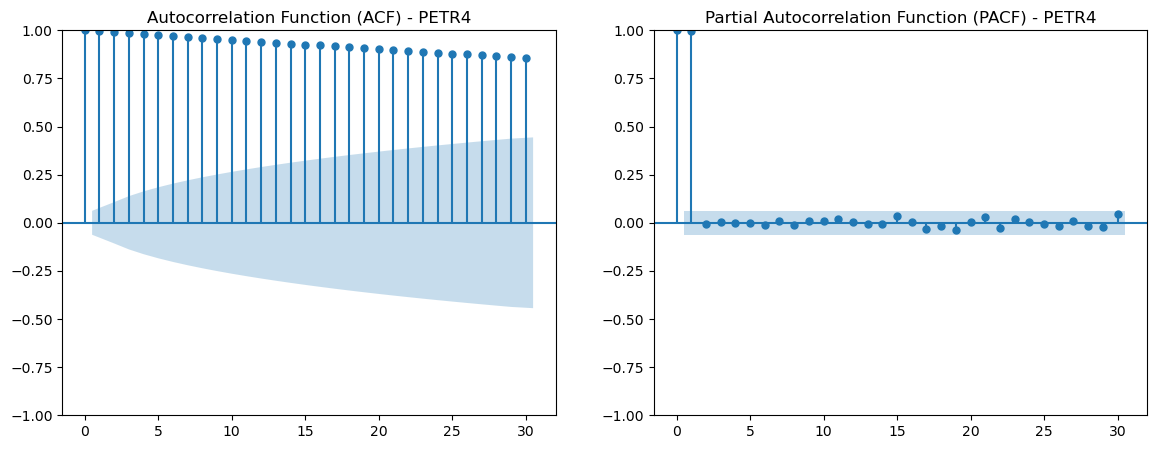

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Baixar dados da PETR4
petr4 = yf.download('PETR4.SA', start='2020-01-01', end='2024-01-01')

# Selecionar apenas o fechamento ajustado
fechamento = petr4['Close'].dropna()

# Plotar ACF e PACF
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
plot_acf(fechamento, lags=30, ax=axes[0])
plot_pacf(fechamento, lags=30, ax=axes[1])
axes[0].set_title('Autocorrelation Function (ACF) - PETR4')
axes[1].set_title('Partial Autocorrelation Function (PACF) - PETR4')
plt.show()

ACF não caiu rápido sugerindo que a série ainda pode ter dependência de longo prazo, indicando um possível processo ARIMA em vez de apenas um AR(p) ou MA(q). Isso também sugere que a série é não é estacionária.

PACF com dois lags significativos indica que o modelo pode ter um componente AR(2), ou seja, um processo autoregressivo de ordem 2 (AR(2)) pode ser um bom ponto de partida.

Visualizando o gráfico de ACF (gráfico de autocorrelação) pode-se observar um gráfico que corresponde a uma série não estacionária. Há grande maioria dos ativos financeiros apresenta um comportamento não estácionário devido a tendências de longo prazo, volatilidade variável, efeitos de choques externos. 

O teste de Dickey-Fuller (ADF) é um teste estatístico para a determinação de uma série temporal estacionária. O teste verifica a presença de uma **raíz unitária**, que se verificada,  mostra que a série tem uma tendência, e portanto, não é estacionária. Se há uma raíz unitária a hipósete é nula, apresentando valores de menores que 0,05. Ao contrario, quando rejeitamos a hipótese nula a série é estacionária. 

In [11]:
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(df['Close'].dropna())

print(f'Valor p: {resultado[1]}') 
# Se for < 0.05, a série é estacionária

Valor p: 0.9963893235608737


In [12]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller

# Baixando dados da PETR4
df = yf.download("PETR4.SA", start="2020-01-01", end="2024-01-01")

# Transformando o índice em datetime e ordenando
df = df[['Close']]
df.dropna(inplace=True)
df.index = pd.to_datetime(df.index)

[*********************100%***********************]  1 of 1 completed


In [13]:
df['Close_diff'] = df['Close'].diff()  # Primeira diferenciação (tira tendência)
df['Close_seasonal_diff'] = df['Close'].diff(7)  # Diferenciação sazonal semanal

# Removendo NaN gerados pela diferenciação
df.dropna(inplace=True)


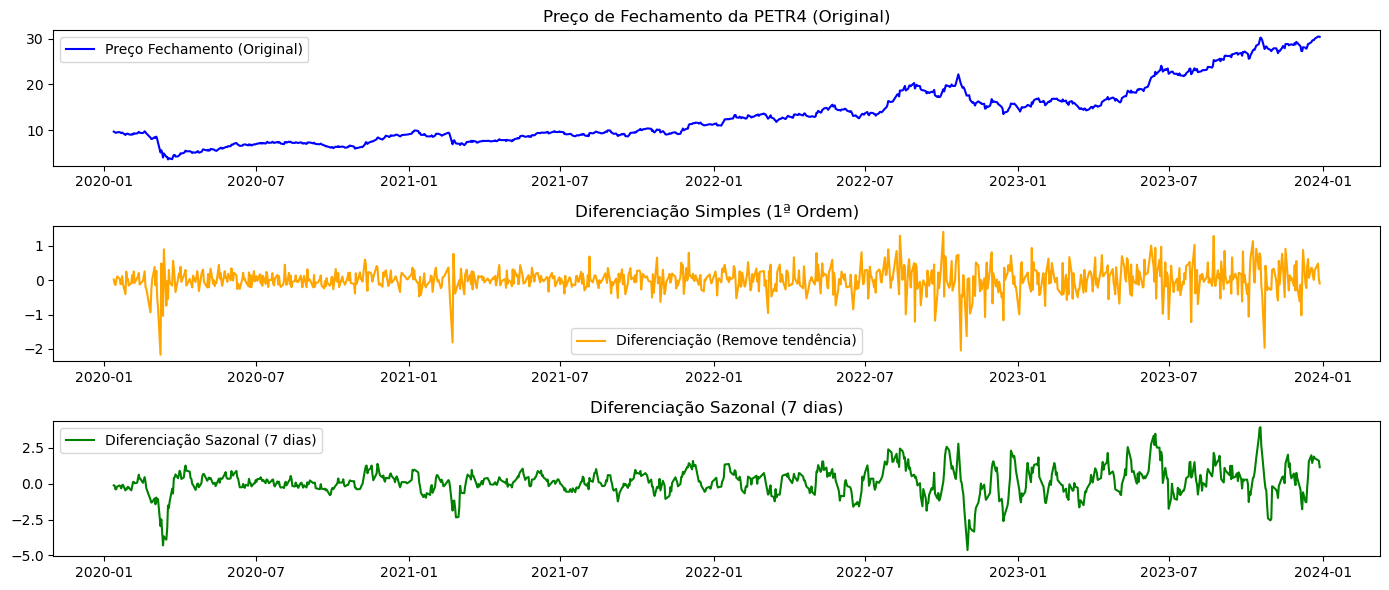

In [14]:
plt.figure(figsize=(14, 6))

# Gráfico da série original
plt.subplot(3, 1, 1)
plt.plot(df['Close'], label="Preço Fechamento (Original)", color='blue')
plt.title("Preço de Fechamento da PETR4 (Original)")
plt.legend()

# Gráfico da série diferenciada (sem sazonalidade)
plt.subplot(3, 1, 2)
plt.plot(df['Close_diff'], label="Diferenciação (Remove tendência)", color='orange')
plt.title("Diferenciação Simples (1ª Ordem)")
plt.legend()

# Gráfico da série com diferenciação sazonal
plt.subplot(3, 1, 3)
plt.plot(df['Close_seasonal_diff'], label="Diferenciação Sazonal (7 dias)", color='green')
plt.title("Diferenciação Sazonal (7 dias)")
plt.legend()

plt.tight_layout()
plt.show()